In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, DenseNet201
from tensorflow.keras.models import Model

# libraries for tuning models
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l2


# utility libraries
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_DenseNet201.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.3
best_batch_size	= 16
best_epochs	= 15


base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

x = base_model.output
x = BatchNormalization()(x) # batch normalization BEFORE activation function
x = tf.keras.layers.Activation('relu')(x)
x = Dropout(best_dropout)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(best_dropout)(x)
x = BatchNormalization()(x) # batch normalization BEFORE activation function
x = tf.keras.layers.Activation('relu')(x)

# final softmax probabilistic classification layer - JUST ADDED L2
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(0.05))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# JUST ADDED: get init accuracy before training
initial_loss_val, initial_accuracy_val = model.evaluate(VAL_GENERATOR)
initial_loss_train, initial_accuracy_train = model.evaluate(TRAIN_GENERATOR)

print("Metrics Before Training:")
print(f" - Training   -> Loss: {initial_loss_train:.4f}, Accuracy: {initial_accuracy_train:.4f}")
print(f" - Validation -> Loss: {initial_loss_val:.4f}, Accuracy: {initial_accuracy_val:.4f}")

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)

# append intial values for plotting
history.history['accuracy'].insert(0, initial_accuracy_train) #training
history.history['loss'].insert(0, initial_loss_train)  # training

history.history['val_accuracy'].insert(0, initial_accuracy_val)  # validation
history.history['val_loss'].insert(0, initial_loss_val)  # validation




/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 779ms/step - accuracy: 0.0784 - loss: 3.8769
191/191 ━━━━━━━━━━━━━━━━━━━━ 151s 792ms/step - accuracy: 0.0654 - loss: 3.8699
Metrics Before Training:
 - Training   -> Loss: 3.8845, Accuracy: 0.0675
 - Validation -> Loss: 3.8767, Accuracy: 0.0727
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 173s 875ms/step - accuracy: 0.4610 - loss: 2.4099 - val_accuracy: 0.7091 - val_loss: 1.4904
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 163s 855ms/step - accuracy: 0.7826 - loss: 1.1321 - val_accuracy: 0.7500 - val_loss: 1.2921
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 162s 851ms/step - accuracy: 0.8317 - loss: 0.9736 - val_accuracy: 0.7591 - val_loss: 1.2240
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 162s 846ms/step - accuracy: 0.8365 - loss: 0.9320 - val_accuracy: 0.7523 - val_loss: 1.1436
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 161s 845ms/step - accuracy: 0.8426 - loss: 0.8981 - val_accuracy: 0.7591 - val_loss: 1.1246
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 162s 848ms/step - accura

# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 910ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.704545,0.775000,0.738095,40.000000
american_house_spider,0.882353,0.750000,0.810811,40.000000
bedbug,0.757576,0.625000,0.684932,40.000000
brown_stink_bug,0.734694,0.900000,0.808989,40.000000
carpenter_ant,0.688889,0.775000,0.729412,40.000000
cellar_spider,0.933333,0.700000,0.800000,40.000000
flea,0.433962,0.575000,0.494624,40.000000
house_centipede,0.972222,0.875000,0.921053,40.000000
silverfish,0.680851,0.800000,0.735632,40.000000
subterranean_termite,0.656250,0.525000,0.583333,40.000000


<Figure size 800x600 with 0 Axes>

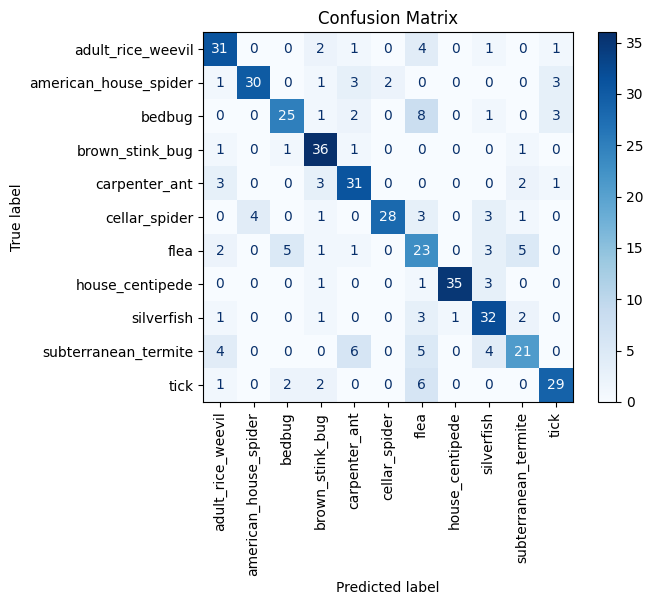

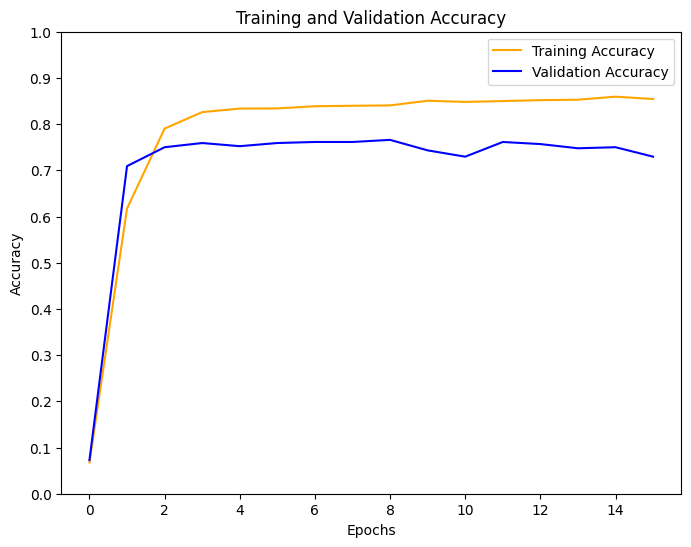

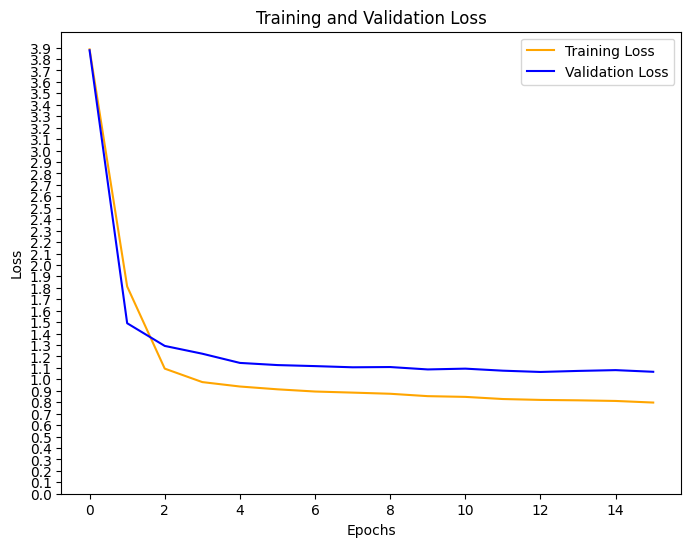

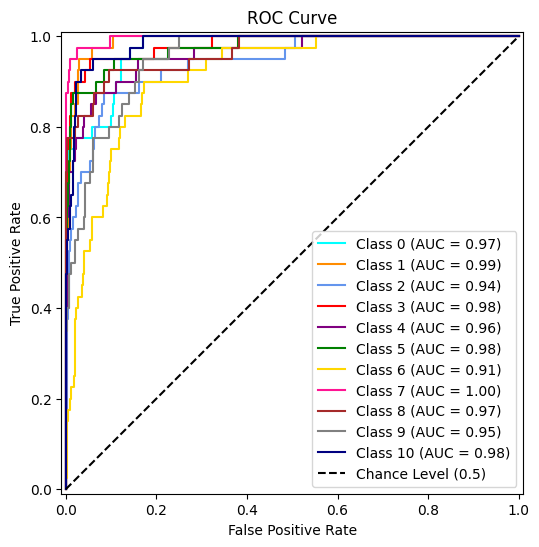

Macro-averaged One-vs-Rest ROC AUC score: 0.97
Accuracy: 0.730
Precision: 0.748
Recall: 0.73
F1 Score: 0.733


{'accuracy': 0.73,
 'precision': 0.748,
 'recall': 0.73,
 'f1_score': 0.733,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.704545  0.775000  0.738095   40.000000
 american_house_spider   0.882353  0.750000  0.810811   40.000000
 bedbug                  0.757576  0.625000  0.684932   40.000000
 brown_stink_bug         0.734694  0.900000  0.808989   40.000000
 carpenter_ant           0.688889  0.775000  0.729412   40.000000
 cellar_spider           0.933333  0.700000  0.800000   40.000000
 flea                    0.433962  0.575000  0.494624   40.000000
 house_centipede         0.972222  0.875000  0.921053   40.000000
 silverfish              0.680851  0.800000  0.735632   40.000000
 subterranean_termite    0.656250  0.525000  0.583333   40.000000
 tick                    0.783784  0.725000  0.753247   40.000000
 accuracy                0.729545  0.729545  0.729545    0.729545
 macro avg               0.748042  0.

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics: 'accuracy': 0.73,'precision': 0.748,'recall': 0.73,'f1_score': 0.733

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 779ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.590909,0.650000,0.619048,20.000000
american_house_spider,0.950000,0.950000,0.950000,20.000000
bedbug,0.700000,0.700000,0.700000,20.000000
brown_stink_bug,0.739130,0.850000,0.790698,20.000000
carpenter_ant,0.727273,0.800000,0.761905,20.000000
cellar_spider,1.000000,0.750000,0.857143,20.000000
flea,0.500000,0.750000,0.600000,20.000000
house_centipede,1.000000,0.800000,0.888889,20.000000
silverfish,0.750000,0.750000,0.750000,20.000000
subterranean_termite,0.625000,0.500000,0.555556,20.000000


<Figure size 800x600 with 0 Axes>

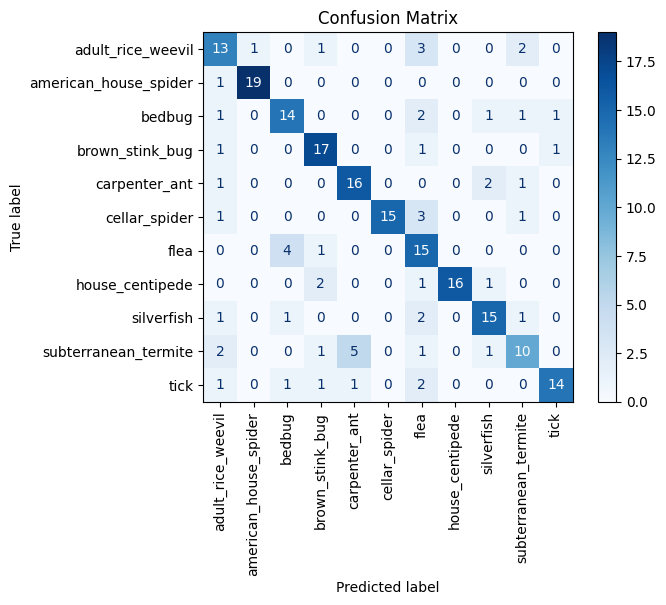

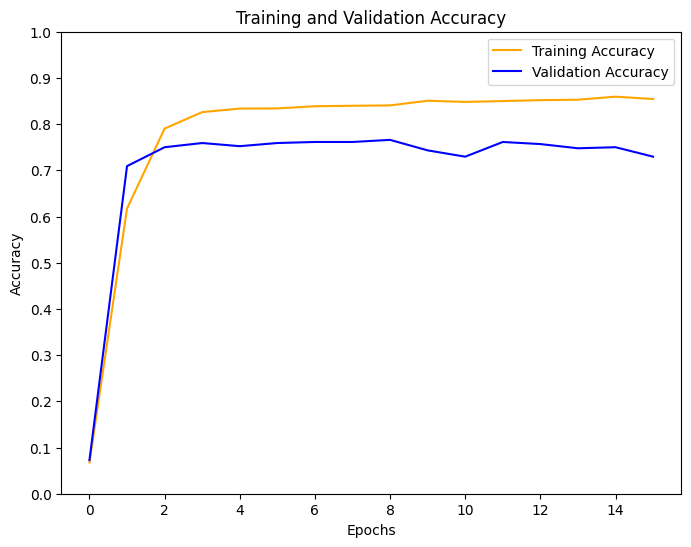

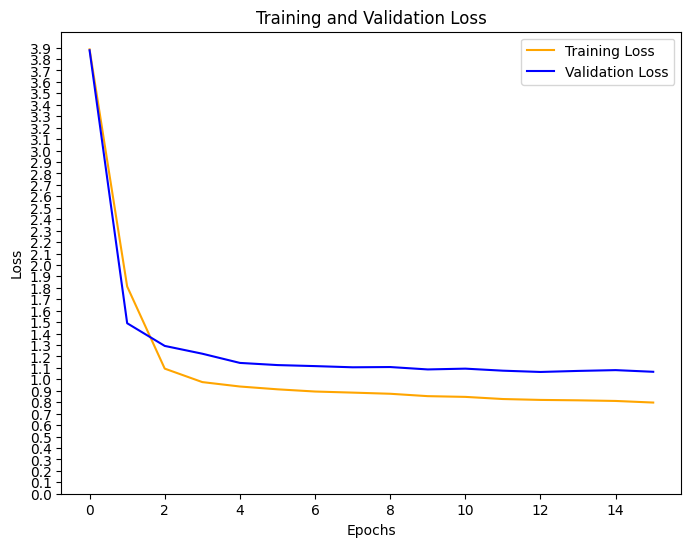

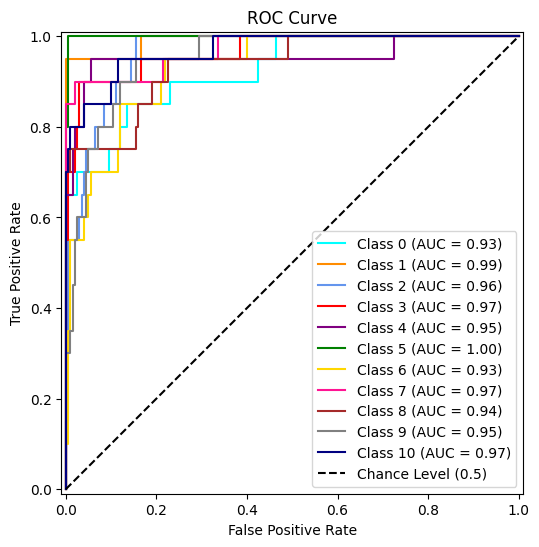

Macro-averaged One-vs-Rest ROC AUC score: 0.96
Accuracy: 0.745
Precision: 0.769
Recall: 0.745
F1 Score: 0.75


{'accuracy': 0.745,
 'precision': 0.769,
 'recall': 0.745,
 'f1_score': 0.75,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.590909  0.650000  0.619048   20.000000
 american_house_spider   0.950000  0.950000  0.950000   20.000000
 bedbug                  0.700000  0.700000  0.700000   20.000000
 brown_stink_bug         0.739130  0.850000  0.790698   20.000000
 carpenter_ant           0.727273  0.800000  0.761905   20.000000
 cellar_spider           1.000000  0.750000  0.857143   20.000000
 flea                    0.500000  0.750000  0.600000   20.000000
 house_centipede         1.000000  0.800000  0.888889   20.000000
 silverfish              0.750000  0.750000  0.750000   20.000000
 subterranean_termite    0.625000  0.500000  0.555556   20.000000
 tick                    0.875000  0.700000  0.777778   20.000000
 accuracy                0.745455  0.745455  0.745455    0.745455
 macro avg               0.768847  0

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.745, 'precision': 0.769,'recall': 0.745, 'f1_score': 0.75